# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [258]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

#number of unique mice IDs
unique_mice_count = combo_df['Mouse ID'].nunique()

#check for mouse IDs w duplicae time points
duplicate_mouse_ids = combo_df[combo_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

#data w mouse ID w dup time points
duplicate_mouse_data = combo_df[combo_df['Mouse ID'].isin(duplicate_mouse_ids)]

# df w removed dup mouse id data
cleaned_df = combo_df[~combo_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data table for preview
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [259]:
# Checking the number of mice in clean data frame
cleaned_unique_mice_count = cleaned_df['Mouse ID'].nunique()

cleaned_unique_mice_count

248

## Summary Statistics

In [260]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_vol_df=cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_summary_stats=tumor_vol_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame.

tumor_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

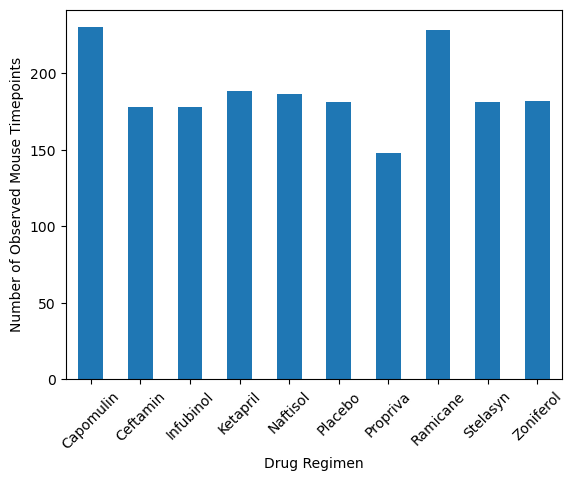

In [261]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot
drug_regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()



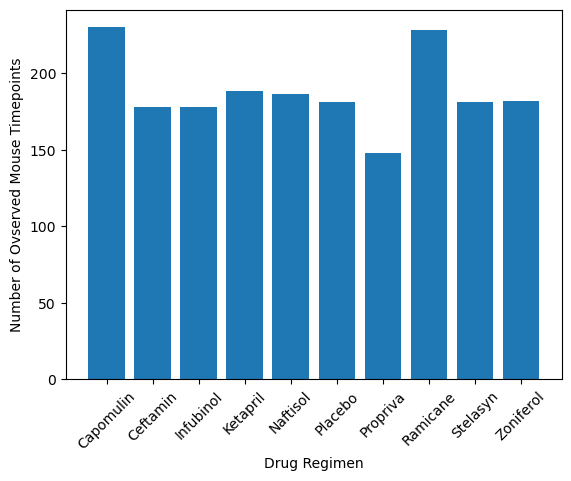

In [262]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Ovserved Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Text(0, 0.5, 'Sex')

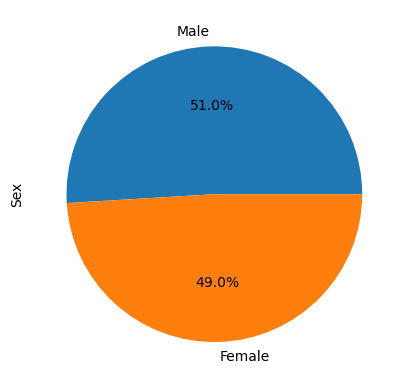

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#m_vs_f_mice = cleaned_df.groupby('Sex').size()

# Calculate the counts of female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

# Plot the pie chart
gender_counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('Sex')


Text(0, 0.5, 'Sex')

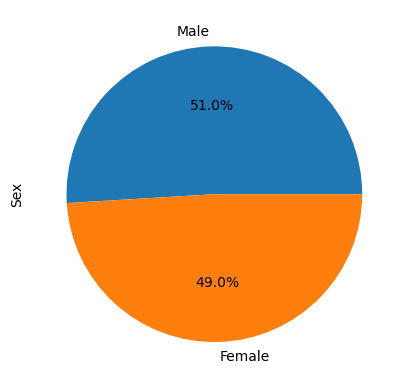

In [264]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = cleaned_df['Sex'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%')


plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [265]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_idx = cleaned_df.groupby('Mouse ID')['Timepoint'].idxmax()

# Create a new DataFrame with the rows corresponding to the maximum 'Timepoint' for each mouse
mouse_maxtimepoint = cleaned_df.loc[max_timepoint_idx]

mouse_maxtimepoint_df = pd.DataFrame(mouse_maxtimepoint)

print(mouse_maxtimepoint_df)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
907      a203         45           67.973419                 2    Infubinol   
289      a251         45           65.525743                 1    Infubinol   
1134     a262         45           70.717621                 4      Placebo   
1487     a275         45           62.999356                 3     Ceftamin   
736      a366         30           63.440686                 1     Stelasyn   
...       ...        ...                 ...               ...          ...   
1566     z435         10           48.710661                 0     Propriva   
646      z578         45           30.638696                 0     Ramicane   
279      z581         45           62.754451                 3    Infubinol   
683      z795         45           65.741070                 3     Naftisol   
109      z969         45           73.867845                 4     Naftisol   

         Sex  Age_months  Weight (g)  
907   Female

In [266]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = mouse_maxtimepoint_df['Drug Regimen']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_names:
    drug_data = mouse_maxtimepoint_df.loc[mouse_maxtimepoint_df['Drug Regimen'] == drug]
    
    tumor_volume = drug_data['Tumor Volume (mm3)']

    tumor_vol_data.append(tumor_volume)

tumor_vol_data
    # Determine outliers using upper and lower bounds


[907     67.973419
 289     65.525743
 233     57.031862
 1423    66.083066
 224     72.226731
 214     36.321346
 897     60.969711
 1459    62.435404
 1659    60.918767
 298     67.289621
 253     66.196912
 261     62.117279
 1427    47.010364
 1434    60.165180
 269     55.629428
 1425    45.699331
 312     54.656549
 1440    55.650681
 226     46.250112
 880     54.048608
 1444    51.542431
 1449    50.005138
 1466    58.268442
 243     67.685569
 279     62.754451
 Name: Tumor Volume (mm3), dtype: float64,
 907     67.973419
 289     65.525743
 233     57.031862
 1423    66.083066
 224     72.226731
 214     36.321346
 897     60.969711
 1459    62.435404
 1659    60.918767
 298     67.289621
 253     66.196912
 261     62.117279
 1427    47.010364
 1434    60.165180
 269     55.629428
 1425    45.699331
 312     54.656549
 1440    55.650681
 226     46.250112
 880     54.048608
 1444    51.542431
 1449    50.005138
 1466    58.268442
 243     67.685569
 279     62.754451
 Name: 

In [267]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [268]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [269]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [270]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
